# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from cstm_pkg_grp_9.data.sets import pop_target
from sklearn.metrics import make_scorer, root_mean_squared_error as rmse
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Loading Data

In [4]:
train_df = pd.read_csv("../../data/processed/train_processed_1.csv")
test_df = pd.read_csv("../../data/processed/test_processed_1.csv")

In [5]:
train_df.head()

,item_id,dept_id,cat_id,store_id,state_id,year,month,day,sales_revenue
0,-0.328719,-0.096686,0.128218,-1.574645,-1.092484,-1.636141,-1.538818,1.516152,5.52
1,-0.454687,-0.096686,0.128218,-1.574645,-1.092484,-1.636141,-1.538818,1.516152,3.12
2,-0.392039,-0.096686,0.128218,-1.574645,-1.092484,-1.636141,-1.538818,1.516152,0.00
3,-0.244169,-0.096686,0.128218,-1.574645,-1.092484,-1.636141,-1.538818,1.516152,0.00
4,-0.158854,-0.096686,0.128218,-1.574645,-1.092484,-1.636141,-1.538818,1.516152,2.80


In [6]:
test_df.head()

,item_id,dept_id,cat_id,store_id,state_id,year,month,day,sales_revenue
0,-0.203720,-0.096686,0.128218,-1.574645,-1.092484,1.66924,-0.679833,0.378393,0.00
1,-0.534879,-0.096686,0.128218,-1.574645,-1.092484,1.66924,-0.679833,0.378393,0.00
2,-0.658027,-0.096686,0.128218,-1.574645,-1.092484,1.66924,-0.679833,0.378393,0.00
3,0.976588,-0.096686,0.128218,-1.574645,-1.092484,1.66924,-0.679833,0.378393,18.56
4,-0.332285,-0.096686,0.128218,-1.574645,-1.092484,1.66924,-0.679833,0.378393,8.64


# Sampling Data

In [7]:
df_train_sample = train_df.sample(frac=0.6, random_state=42)
df_test_sample = test_df

In [8]:
features_train, target_train = pop_target(df_train_sample, 'sales_revenue')
X_test, y_test = pop_target(df_test_sample, 'sales_revenue')

# Splitting Data

In [9]:
X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.3, random_state=42)

# Baseline Model

In [10]:
y_mean = y_train.mean()
y_mean

np.float64(4.100991207383548)

In [11]:
y_base = np.full(y_train.shape, y_mean)
print("RMSE on Training Data:", rmse(y_train, y_base))

RMSE on Training Data: 10.485546198416937


In [12]:
y_val_base = np.full(y_val.shape, y_mean)
print("RMSE on Validation Data:", rmse(y_val, y_val_base))

RMSE on Validation Data: 10.421423291969589


In [13]:
y_test_base = np.full(y_test.shape, y_mean)
print("RMSE on Testing Data:", rmse(y_test, y_test_base))

RMSE on Testing Data: 11.313842329627265


# Modelling

## Decision Trere Model 1

Training the data on a regular linear regression model

In [14]:
dt_1 = DecisionTreeRegressor()

In [15]:
dt_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
y_train_pred = dt_1.predict(X_train)
train_rmse = rmse(y_train, y_train_pred)
print(train_rmse)

4.443033867722337e-17


In [17]:
y_val_pred = dt_1.predict(X_val)
val_rmse = rmse(y_val, y_val_pred)
print(val_rmse)

9.042000339182355


## Decision Tree Model 2

In [18]:
dt_2 = DecisionTreeRegressor(max_depth=30, min_samples_split=5, min_samples_leaf=2, max_leaf_nodes=30)

In [19]:
dt_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, min_samples_leaf=2,
                      min_samples_split=5)

In [20]:
y_train_pred = dt_2.predict(X_train)
train_rmse = rmse(y_train, y_train_pred)
print(train_rmse)

8.508476739641365


In [21]:
y_val_pred = dt_2.predict(X_val)
val_rmse = rmse(y_val, y_val_pred)
print(val_rmse)

8.471027125012988


## Testing Results

Using test set on the best model

In [22]:
y_test_pred = dt_1.predict(X_test)
test_rmse = rmse(y_test, y_test_pred)
print(test_rmse)

10.585832920535664


### Feature importance graph

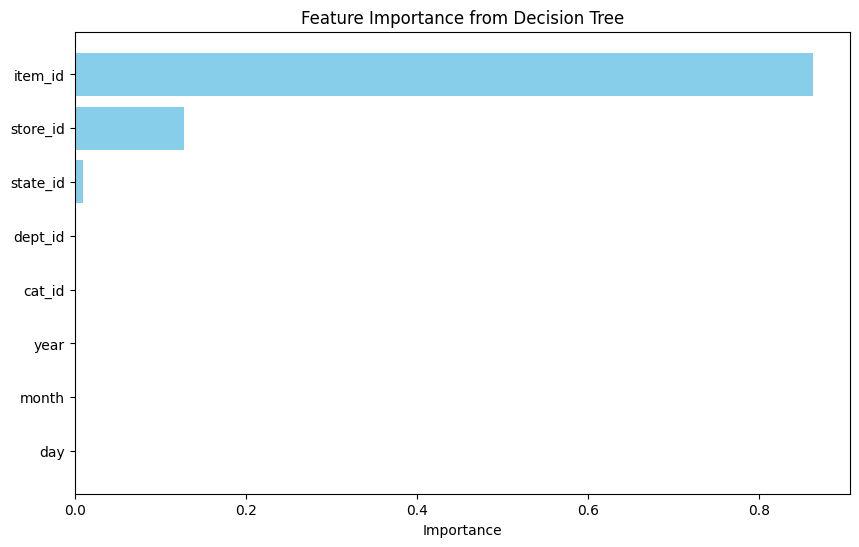

In [26]:
import matplotlib.pyplot as plt
importances = dt_2.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()